In [48]:
import pickle
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import chi2
from sklearn import preprocessing
import numpy as np
from sklearn import metrics
from scipy.special import logit, expit
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from scipy.special import entr

In [49]:
df = pd.read_csv('data/df_level2.csv')

df['STRATIO_scaled'] = preprocessing.scale(df.STRATIO)
df['SCHSIZE_scaled'] = preprocessing.scale(df.SCHSIZE)
df['mean_ESCS_std_scaled'] = preprocessing.scale(df.mean_ESCS_std)

In [50]:
Q = pd.read_excel('data/iso_countries.xlsx')
Q = Q.replace({'QCI': 'CHN'})

In [51]:
n_fix = 2
ran_var = 'False'
ran_int = 'True'
tol = 0.1
variab = 'SE'
model = 'B'

path = 'output/case_study_results'


fileA = open(path + '/' + ran_var + '_' + ran_int + '_' + str(n_fix) + '_' + variab + '_' + str(tol) + '_' + model + '_merging' +'.pickle','rb')

knots, par, W, hess_ran, hess_fix, group, a = pickle.load(fileA)


In [52]:
entropy = []
subpops = W.shape[1]
for i in range(W.shape[0]):
    entropy.append(entr(W[i,:]).sum())
print(np.mean(entropy)/np.log(subpops))


0.139282307181081


In [53]:
knots

array([-2.67944966, -0.98373615,  0.02211887, -1.58945163, -2.08774815,
        1.24514471,  2.23727924,  0.43724823, -0.56334814, -3.53267148])

In [54]:
range(len(knots))

range(0, 10)

In [55]:
X = pd.DataFrame({'cluster': range(len(knots)), 'knots': knots})
Y = pd.DataFrame({'Country': df.groupby('CNT').count().reset_index()['CNT'], 'cluster': group})
Z = Y.merge(X, on=['cluster'])
Z

,Country,cluster,knots
0,Albania,1,-0.983736
1,Brazil,1,-0.983736
2,Ireland,1,-0.983736
3,Lebanon,1,-0.983736
4,Spain,1,-0.983736
5,Thailand,1,-0.983736
6,United States,1,-0.983736
7,Argentina,5,1.245145
8,Baku (Azerbaijan),5,1.245145
9,Dominican Republic,5,1.245145


In [56]:
par

array([-3.26084447, -0.62026433])

In [57]:
knots

array([-2.67944966, -0.98373615,  0.02211887, -1.58945163, -2.08774815,
        1.24514471,  2.23727924,  0.43724823, -0.56334814, -3.53267148])

In [58]:
pd.DataFrame({'knots':knots,
              'stderr': np.round(np.array(np.sqrt(1 / hess_ran)).flatten(),3)})

,knots,stderr
0,-2.679450,0.080
1,-0.983736,0.054
2,0.022119,0.105
3,-1.589452,0.078
4,-2.087748,0.070
5,1.245145,0.076
6,2.237279,0.137
7,0.437248,0.070
8,-0.563348,0.106
9,-3.532671,0.319


In [59]:
np.array(st.norm.ppf(1 - tol / 2) * np.sqrt(1 / hess_ran))#[2][0]

array([[0.13092064],
       [0.08841594],
       [0.17242219],
       [0.12889754],
       [0.11454101],
       [0.1245104 ],
       [0.22587519],
       [0.11466716],
       [0.17424012],
       [0.52547123]])

In [60]:
np.sqrt(1 / hess_fix)

array([0.05214445, 0.02765222])

In [61]:
par

array([-3.26084447, -0.62026433])

In [62]:
Z = Z.merge(Q, on=['Country'])
y = df['Y_BIN_MATH']
df['Country'] = df['CNT']
df = df.merge(Z, on=['Country'])

In [63]:
df

,CNTSCHID,CNT,PRIVATESCH,STRATIO,SCHSIZE,sum_MATHbelow,mean_ESCS,mean_ESCS_std,Y_MATH,Y_BIN_MATH,STRATIO_scaled,SCHSIZE_scaled,mean_ESCS_std_scaled,Country,cluster,knots,ISO
0,800004,Albania,public,9.7619,205,11,-1.152958,-0.268234,5,1,-0.436611,-0.725775,-0.268767,Albania,1,-0.983736,ALB
1,800006,Albania,public,18.0000,315,15,-1.343747,-0.565595,5,1,0.375855,-0.599796,-0.566719,Albania,1,-0.983736,ALB
2,800007,Albania,public,4.7368,45,2,-2.401967,-2.214922,4,1,-0.932202,-0.909017,-2.219323,Albania,1,-0.983736,ALB
3,800008,Albania,private,13.8125,221,6,-0.135900,1.316941,3,1,-0.037129,-0.707451,1.319557,Albania,1,-0.983736,ALB
4,800009,Albania,public,16.9691,823,19,-0.560240,0.655569,2,0,0.274185,-0.018002,0.656871,Albania,1,-0.983736,ALB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12615,97500358,B-S-J-Z (China),public,8.0786,1131,0,0.828180,1.595021,0,0,-0.602623,0.334739,1.598190,B-S-J-Z (China),9,-3.532671,CHN
12616,97500359,B-S-J-Z (China),public,11.3202,2298,0,-0.178994,0.251551,0,0,-0.282927,1.671262,0.252051,B-S-J-Z (China),9,-3.532671,CHN
12617,97500360,B-S-J-Z (China),public,9.7932,2605,0,0.190169,0.743977,0,0,-0.433524,2.022858,0.745455,B-S-J-Z (China),9,-3.532671,CHN
12618,97500361,B-S-J-Z (China),public,11.7941,2005,3,-0.929946,-0.750143,0,0,-0.236189,1.335700,-0.751634,B-S-J-Z (China),9,-3.532671,CHN


In [64]:
df_pred = pd.read_csv('output/df_level2_pred.csv')
df_pred

,CNTSCHID,CNT,PRIVATESCH,STRATIO,SCHSIZE,sum_READbelow,sum_MATHbelow,sum_SCIEbelow,mean_ESCS,mean_ESCS_std,Y_READ,Y_MATH,Y_SCIE,Y_BIN_MATH,Y_BIN_SCIE,Y_BIN_READ,pred_GLMM_Poi,pred_GLMM_Ber
0,800004,Albania,public,9.7619,205,12,11,11,-1.152958,-0.268234,6,5,5,1,1,1,5.781017,0.784725
1,800006,Albania,public,18.0000,315,17,15,16,-1.343747,-0.565595,5,5,5,1,1,1,5.010674,0.745180
2,800007,Albania,public,4.7368,45,3,2,2,-2.401967,-2.214922,7,4,4,1,1,1,8.922084,0.956899
3,800008,Albania,private,13.8125,221,7,6,9,-0.135900,1.316941,3,3,4,1,1,1,4.850775,0.560730
4,800009,Albania,public,16.9691,823,29,19,29,-0.560240,0.655569,4,2,4,0,1,1,2.023349,0.172899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12615,97500358,B-S-J-Z (China),public,8.0786,1131,0,0,0,0.828180,1.595021,0,0,0,0,0,0,0.280770,0.004108
12616,97500359,B-S-J-Z (China),public,11.3202,2298,0,0,0,-0.178994,0.251551,0,0,0,0,0,0,0.051849,0.000128
12617,97500360,B-S-J-Z (China),public,9.7932,2605,0,0,0,0.190169,0.743977,0,0,0,0,0,0,0.030681,0.000030
12618,97500361,B-S-J-Z (China),public,11.7941,2005,5,3,3,-0.929946,-0.750143,0,0,0,0,0,0,0.089981,0.000708


In [65]:
def plot_roc_curve(fpr, tpr, title):
    plt.plot(fpr, tpr, color='dimgrey', label='ROC')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.rcParams["figure.figsize"] = (5.5,4)
    plt.title(title)
    plt.savefig("output/case_study_results/" + str(title) + ".pdf")
    plt.legend()
    plt.show()

SPGLMM
Threshold value is: 0.43968129053401867
AUC 0.916152896262431


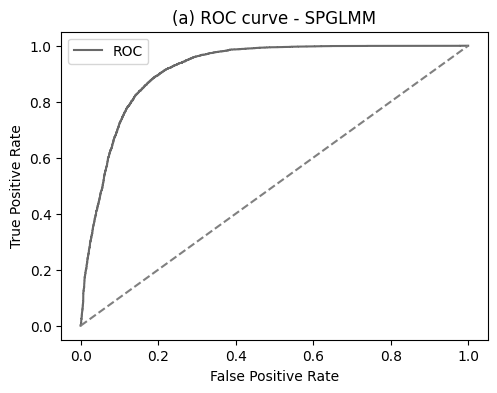

None
Sensitivity 0.8127792672028596
Specificity 0.8868946833728412
FPR 0.11310531662715884
Accuracy 0.8474643423137876
APER 0.15253565768621236
GLMM
Threshold value is: 2.70713001097085
AUC 0.9030275219556644


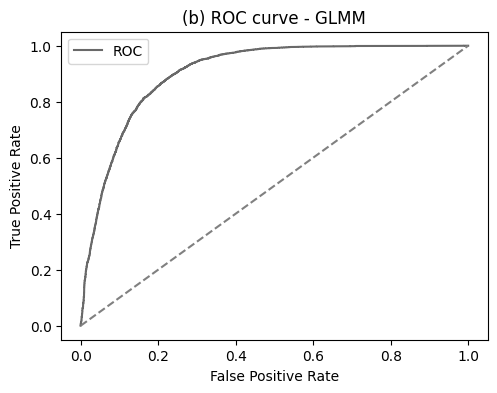

None
Sensitivity 0.8170694864048338
Specificity 0.8806666666666667
FPR 0.11933333333333329
Accuracy 0.8473058637083993
APER 0.15269413629160067


In [66]:
if model == 'B':
  # SPGLMM
  print('SPGLMM')

  val = np.array( df['knots'] + par[0] * df['SCHSIZE_scaled'] + par[1] * df['mean_ESCS_std_scaled'] )
  pred_SPGLMM = np.array( expit(val) )
  fpr, tpr, thresholds = metrics.roc_curve(y, pred_SPGLMM, pos_label=1)

  optimal_idx = np.argmax(tpr - fpr)
  optimal_threshold = thresholds[optimal_idx]
  print("Threshold value is:", optimal_threshold)

  print('AUC', metrics.auc(fpr, tpr))
  print(plot_roc_curve(fpr, tpr, '(a) ROC curve - SPGLMM'))

  pred_SPGLMM_thr = [1 if(x > 0.4397) else 0 for x in pred_SPGLMM]
  misclass_table = confusion_matrix(y, pred_SPGLMM_thr)
  sens = misclass_table[1,1]/(misclass_table[1,1] + misclass_table[0,1])
  print('Sensitivity', sens)
  spec = misclass_table[0,0]/(misclass_table[0,0] + misclass_table[1,0])
  print('Specificity', spec)
  fpr = 1 - spec
  print('FPR', fpr)
  acc  = (misclass_table[0,0] + misclass_table[1,1])/(misclass_table[0,0] + misclass_table[1,1] + misclass_table[1,0] + misclass_table[0,1])
  print('Accuracy', acc)
  aper = 1 - acc
  print('APER', aper)



  # GLMM
  print('GLMM')
  fpr, tpr, thresholds = metrics.roc_curve(y, df_pred['pred_GLMM_Poi'], pos_label=1)

  optimal_idx = np.argmax(tpr - fpr)
  optimal_threshold = thresholds[optimal_idx]
  print("Threshold value is:", optimal_threshold)

  print('AUC', metrics.auc(fpr, tpr))
  print(plot_roc_curve(fpr, tpr, '(b) ROC curve - GLMM'))

  pred_GLMM_thr = [1 if(x > 0.4523) else 0 for x in pred_SPGLMM]
  misclass_table = confusion_matrix(y, pred_GLMM_thr)
  sens = misclass_table[1,1]/(misclass_table[1,1] + misclass_table[0,1])
  print('Sensitivity', sens)
  spec = misclass_table[0,0]/(misclass_table[0,0] + misclass_table[1,0])
  print('Specificity', spec)
  fpr = 1 - spec
  print('FPR', fpr)
  acc  = (misclass_table[0,0] + misclass_table[1,1])/(misclass_table[0,0] + misclass_table[1,1] + misclass_table[1,0] + misclass_table[0,1])
  print('Accuracy', acc)
  aper = 1 - acc
  print('APER', aper)



elif model == 'P':

  # SPGLMM
  print('SPGLMM')

  val = (df['knots'] + par[0] * df['SCHSIZE_scaled'] + par[1] * df['mean_ESCS_std_scaled']).values
  y_pred = np.round(np.exp(val))
  y = df['Y_MATH']

  MSE = np.mean((y - y_pred)**2)
  MSE_log = np.mean((np.log(y+1) - np.log(y_pred+1))**2)
  CSE = np.mean((y - y_pred)**2 / (y_pred+1))
  print('MSE', MSE)
  print('MSE_log', MSE_log)
  print('CSE', CSE)



  # GLMM
  print('GLMM')
  y_pred = np.round(df_pred['pred_GLMM_Poi'])
  y = df['Y_MATH']

  MSE = np.mean((y - y_pred)**2)
  MSE_log = np.mean((np.log(y+1) - np.log(y_pred+1))**2)
  CSE = np.mean((y - y_pred)**2 / (y_pred+1))
  print('MSE', MSE)
  print('MSE_log', MSE_log)
  print('CSE', CSE)

  y_pred = np.round(df_pred['pred_GLMM_Poi'])
  y = df['Y_MATH']

In [67]:
val = (df['knots'] + par[0] * df['SCHSIZE_scaled'] + par[1] * df['mean_ESCS_std_scaled']).values
print(val)
np.round(np.exp(val))

[  1.54961025   1.3236213    3.35699522 ... -10.59127735  -7.42196974
 -10.76672101]


array([ 5.,  4., 29., ...,  0.,  0.,  0.])

In [68]:
# FOR THE COMPUTATION OF THE P-VALUES

n_fix = 1

variab = 'S'
fileA = open('output/case_study_results/' + ran_var + '_' + ran_int + '_' + str(n_fix) + '_' + variab + '_' + str(tol) + '_' + model + '_merging' +'.pickle','rb')
knots, par, W, hess_ran, hess_fix, group, a_ristr = pickle.load(fileA)
LR = 2 * (a - a_ristr)
print('p-value, LR test ' + variab)
print(chi2.sf(LR,1))


variab = 'E'
fileA = open('output/case_study_results/' + ran_var + '_' + ran_int + '_' + str(n_fix) + '_' + variab + '_' + str(tol) + '_' + model + '_merging' +'.pickle','rb')
knots, par, W, hess_ran, hess_fix, group, a_ristr = pickle.load(fileA)
LR = 2 * (a - a_ristr)
print('p-value, LR test ' + variab)
print(chi2.sf(LR,1))


p-value, LR test S
2.6422356662440257e-110
p-value, LR test E
0.0


# PLOT ON MAPS

In [69]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

gdf = world.merge(Z, how='left', left_on='iso_a3', right_on='ISO')

/var/folders/lg/0lc2g3rx12jf4ztglsz2bgc80000gn/T/ipykernel_30096/4163474315.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


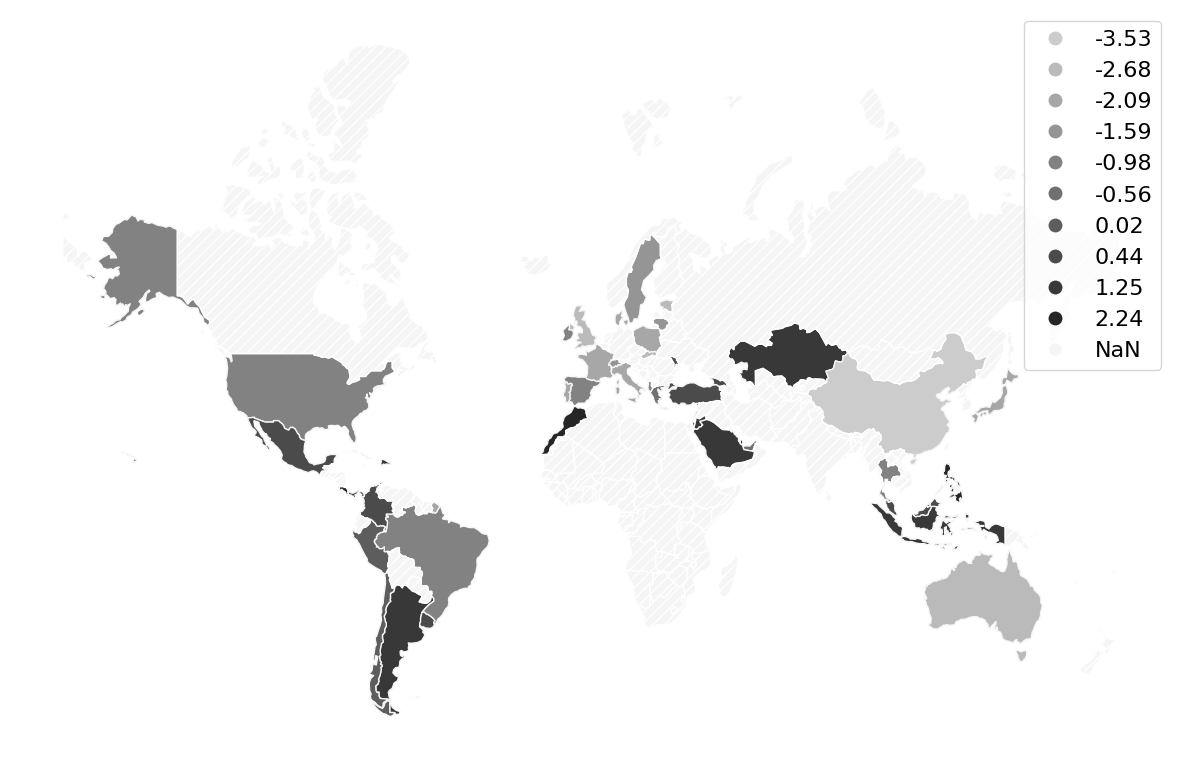

In [70]:
# Remove territories close to the poles for plotting in pseudo mercator and reproject to pm
gdf = gdf[~(gdf.iso_a3.isin(['ATA', 'GRL', 'ATF']))].to_crs('epsg:3857')
gdf['knots'] = gdf.knots.round(2)

import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
viridis_big = mpl.colormaps['binary']
newcmp = ListedColormap(viridis_big(np.linspace(0.2, 0.85, 10)))

gdf.plot(
    column = 'knots',
    figsize = (15,10),
    missing_kwds = {
        'edgecolor': 'white',#'whitesmoke',
        'facecolor': 'whitesmoke',#'gainsboro', #'lightgray',
        "hatch": "///"},
    cmap = newcmp, #Spectral', #'YlOrBr',
    categorical = True,
    legend = True,
    legend_kwds={'fontsize': 16},
    edgecolors = 'whitesmoke' #'lightgray' #'whitesmoke' #'lightgray'
)

plt.axis('off')
if model == 'P':
  if tol == 0.01:
    #plt.title('Poisson response  -  α = 0.01')
    plt.savefig('output/case_study_results/Map_Poi_001.pdf', bbox_inches='tight')
  elif tol == 0.05:
    #plt.title('Poisson response  -  α = 0.05')
    plt.savefig('output/case_study_results/Map_Poi_005.pdf', bbox_inches='tight')
  elif tol == 0.1:
    #plt.title('Poisson response  -  α = 0.10')
    plt.savefig('output/case_study_results/Map_Poi_010.pdf', bbox_inches='tight')
elif model == 'B':
  if tol == 0.01:
    #plt.title('Bernoulli response  -  α = 0.01')
    plt.savefig('output/case_study_results/Map_Ber_001.pdf', bbox_inches='tight')
  elif tol == 0.05:
    #plt.title('Bernoulli response  -  α = 0.05')
    plt.savefig('output/case_study_results/Map_Ber_005.pdf', bbox_inches='tight')
  elif tol == 0.1:
    #plt.title('Bernoulli response  -  α = 0.10')
    plt.savefig('output/case_study_results/Map_Ber_010.pdf', bbox_inches='tight')

plt.show()

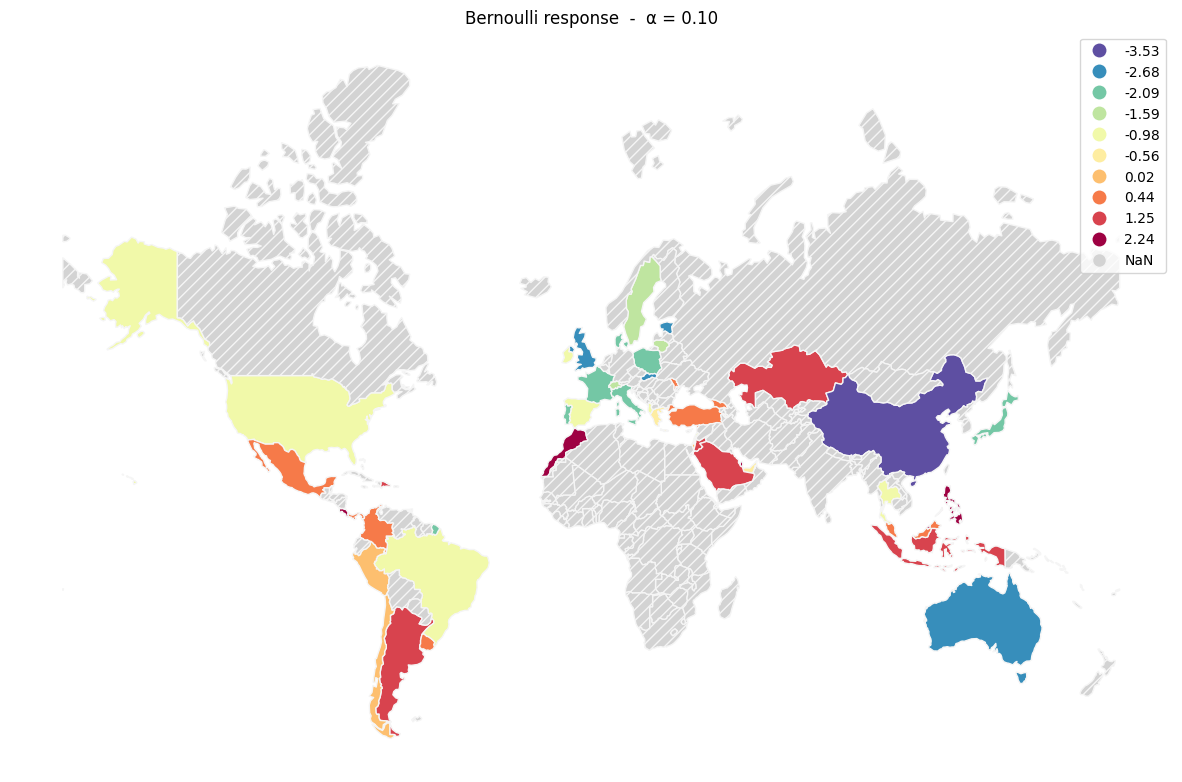

In [71]:
# Remove territories close to the poles for plotting in pseudo mercator and reproject to pm
gdf = gdf[~(gdf.iso_a3.isin(['ATA', 'GRL', 'ATF']))].to_crs('epsg:3857')
gdf['knots'] = gdf.knots.round(2)

orig_map = mpl.colormaps['Spectral']
reversed_map = orig_map.reversed()

gdf.plot(
    column = 'knots',
    figsize = (15,10),
    missing_kwds = {
        'edgecolor': 'whitesmoke',
        'facecolor': 'lightgray',
        "hatch": "///"},
    cmap = reversed_map, #'YlOrBr',
    categorical = True,
    legend = True,
    edgecolors = 'whitesmoke' #'lightgray' #'whitesmoke' #'lightgray'
)

plt.axis('off')
if model == 'P':
  if tol == 0.01:
    plt.title('Poisson response  -  α = 0.01')
    #plt.savefig('Map_Poi_001.pdf', bbox_inches='tight')
  elif tol == 0.05:
    plt.title('Poisson response  -  α = 0.05')
    #plt.savefig('Map_Poi_005.pdf', bbox_inches='tight')
  elif tol == 0.1:
    plt.title('Poisson response  -  α = 0.10')
    #plt.savefig('Map_Poi_010.pdf', bbox_inches='tight')
elif model == 'B':
  if tol == 0.01:
    plt.title('Bernoulli response  -  α = 0.01')
    #plt.savefig('Map_Ber_001.pdf', bbox_inches='tight')
  elif tol == 0.05:
    plt.title('Bernoulli response  -  α = 0.05')
    #plt.savefig('Map_Ber_005.pdf', bbox_inches='tight')
  elif tol == 0.1:
    plt.title('Bernoulli response  -  α = 0.10')
    #plt.savefig('Map_Ber_010.pdf', bbox_inches='tight')

plt.show()